In [15]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Clostridium 

In [5]:
clostridium_df = pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Clostridium")
clostridium_df.head()

,Sample ID,TP_r1,TP_r2,TP_avg,cp_inhibitionZone,cp_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,p0101-M1,412.005,>420.000,412.0050,0,0.0,PI533876,Caudatum,Nigeria,KA 12 Janjari,R,1.0,0
1,p0101-M2,320.088,325.318,322.7030,0,0.0,PI656116,NaN,Mali,SC 1506,R,1.0,0
2,p0102-M1,>420.000,>420.000,420.0000,0,0.0,PI576350,Kafir-Caudatum,USA,SAP-417,R,1.0,4
3,p0102-M2,>420.000,>420.000,420.0000,0,0.0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
4,p0103-M2,413.011,414.75,413.8805,0,0.0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND


In [131]:
# cols = [4,6,8]
# clostridium_df=pd.read_excel("LKS_phenolicVsPathogen.xlsx", sheet_name= "Clostridium", usecols = cols)
# clostridium_df.head()

[Text(0,0.5,u' Total phenolic [GAE/g]'), Text(0.5,0,u'Inhibition zone (mm)')]

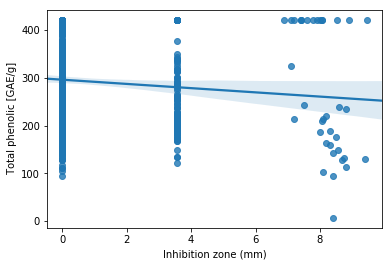

In [6]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
cp = sns.regplot(x="cp_AMA", y="TP_avg", data=clostridium_df)
cp.set(xlabel= "Inhibition zone (mm)", ylabel=" Total phenolic [GAE/g]")

In [10]:
clostridium_df_filtered = clostridium_df.loc[:,["Tannins","Testa","cp_AMA", "PI"]]
clostridium_df_filtered.dropna(inplace=True)
clostridium_df_filtered.Tannins.replace("ND", 0, inplace=True)
clostridium_df_filtered["Testa"] = clostridium_df_filtered.Testa.astype(int)
clostridium_df_filtered.head()

,Tannins,Testa,cp_AMA,PI
0,0.0,1,0.0,PI533876
1,0.0,1,0.0,PI656116
2,4.0,1,0.0,PI576350
3,22.7,1,0.0,PI641849
4,0.0,0,0.0,PI533877


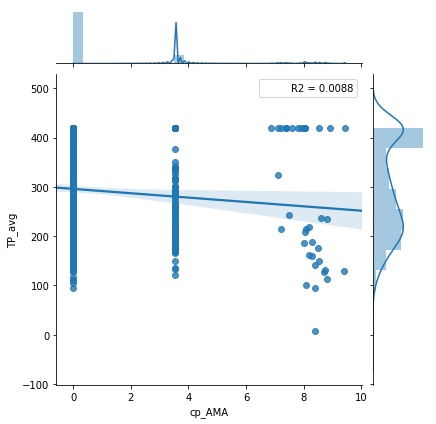

In [7]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x="cp_AMA", y="TP_avg", data=clostridium_df, kind="reg", stat_func=R2)

In [222]:
# clostridium_df_filtered = pd.read_excel("LKS_phenolicVsPathogen_Clostridium_Filtered.xls")
# clostridium_df_filtered.head()

,[phenolics],c.perfringens AMA_#,AMA_Dum,Testa,Rep,DTA,DTM,PH,GNP,TGW,YPP,seed_density,GFD
[phenolics],1.000000,-0.093818,-0.046961,0.545292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c.perfringens AMA_#,-0.093818,1.000000,0.798252,-0.017210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMA_Dum,-0.046961,0.798252,1.000000,0.007191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Testa,0.545292,-0.017210,0.007191,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GNP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[Text(0,0.5,u'Tannins [g of CE/kg]'), Text(0.5,0,u'Testa')]

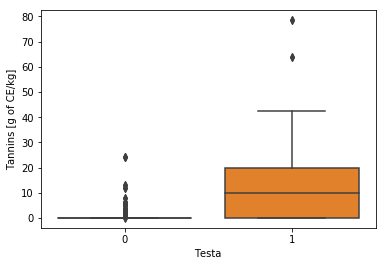

In [11]:
Cpbox=sns.boxplot(x="Testa", y="Tannins", data=clostridium_df_filtered)
Cpbox.set(xlabel = "Testa", ylabel="Tannins [g of CE/kg]")

[Text(0,0.5,u'Tannins [g of CE/kg]'), Text(0.5,0,u'Inhibition zone (mm)')]

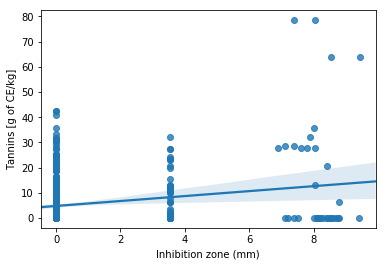

In [19]:
Cpscat = sns.regplot(x="cp_AMA", y="Tannins", data=clostridium_df_filtered)
Cpscat.set(xlabel = "Inhibition zone (mm)", ylabel="Tannins [g of CE/kg]")


[Text(0,0.5,u'Inhibition zone(mm)')]

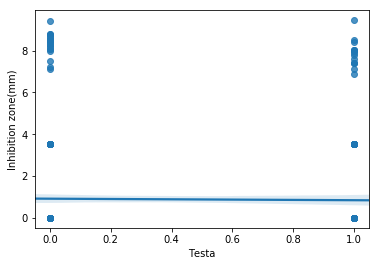

In [20]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

testa_am=sns.regplot(x="Testa", y="cp_AMA", data=clostridium_df)
testa_am.set(ylabel="Inhibition zone(mm)")


In [21]:
ama = list(clostridium_df_filtered["cp_AMA"])
new_ama = []
for i in ama:
    if i < 1:
        new_ama.append("none")
    if ((i >3.5) and (i<4)):
        new_ama.append("weak")
    if (i>=4):
        new_ama.append("strong")
clostridium_df_filtered["AMA"] = new_ama
set(new_ama)

{'none', 'strong', 'weak'}

In [22]:
pis = ["PI329440","PI533869","PI533871","PI533948",
       "PI533979","PI534115","PI595739","PI597957",
       "PI656024","PI656059","PI656088","PI656091",
       "PI656112"]

In [23]:
pi_values = clostridium_df_filtered[clostridium_df_filtered.PI.isin(pis)].sort_values(by="PI")
print(pi_values.PI.unique())
pi_values.head(n=100)

[u'PI329440' u'PI533869' u'PI533871' u'PI533948' u'PI533979' u'PI534115'
 u'PI595739' u'PI597957' u'PI656024' u'PI656059' u'PI656088' u'PI656091'
 u'PI656112']


,Tannins,Testa,cp_AMA,PI,AMA
113,0.0,0,0.00,PI329440,none
778,0.0,0,8.80,PI329440,strong
769,0.0,0,8.40,PI533869,strong
762,0.0,0,8.10,PI533869,strong
776,0.0,0,8.75,PI533871,strong
763,0.0,0,8.10,PI533871,strong
775,0.0,0,8.70,PI533948,strong
773,0.0,0,8.55,PI533948,strong
644,0.0,0,3.55,PI533979,weak
764,0.0,0,8.20,PI533979,strong


In [24]:
# ['PI329440' 'PI533869' 'PI533871' 'PI533948' 'PI533979' 'PI534115'
# 'PI595739' 'PI597957' 'PI656024' 'PI656059' 'PI656088' 'PI656091'
# 'PI656112']
test = clostridium_df_filtered.groupby("PI").min()
test = test[test["cp_AMA"] != 0]
test = test[test["cp_AMA"] != 0]
print(test)
test = test["cp_AMA"].index
set(test).intersection(set(pis))

          Tannins  Testa  cp_AMA     AMA
PI                                      
PI533762      6.3      1    3.55    weak
PI533869      0.0      0    8.10  strong
PI533871      0.0      0    8.10  strong
PI533940      6.4      0    3.55  strong
PI533948      0.0      0    8.55  strong
PI533979      0.0      0    3.55  strong
PI534114      9.9      1    3.55    weak
PI534115      0.0      0    8.00  strong
PI542406     28.5      1    7.10  strong
PI566819     23.5      1    3.55    weak
PI576376      0.4      0    3.55    weak
PI576393     20.8      1    3.55  strong
PI595739      0.0      0    9.40  strong
PI595740     12.7      1    3.55    weak
PI597945      0.0      0    3.55    weak
PI597957      0.0      0    3.55  strong
PI598069      0.0      1    3.55    weak
PI641836     32.1      1    3.55  strong
PI642998     78.5      1    7.40  strong
PI655980      0.0      1    7.40  strong
PI655983     27.7      1    7.60  strong
PI655995     63.8      1    8.53  strong
PI656003     19.

{'PI533869',
 'PI533871',
 'PI533948',
 'PI533979',
 'PI534115',
 'PI595739',
 'PI597957',
 'PI656088',
 'PI656112'}

In [169]:
pd.crosstab?

In [25]:
pd.crosstab(np.array(clostridium_df_filtered.Testa), 
            [np.array(clostridium_df_filtered.AMA)])

col_0,none,strong,weak
row_0,,,
0,299,19,51
1,227,15,32


In [26]:
 clostridium_df_filtered.groupby("PI").mean()["cp_AMA"].value_counts()#

0.000    257
1.775     51
3.550     17
8.400      1
8.250      1
8.625      1
5.875      1
7.250      1
4.000      1
3.750      1
5.375      1
6.075      1
9.400      1
6.175      1
7.825      1
7.400      1
7.340      1
7.725      1
4.400      1
8.200      1
5.975      1
5.725      1
4.100      1
8.425      1
4.025      1
8.990      1
Name: cp_AMA, dtype: int64

In [27]:
clostridium_df_filtered.sort_values(by="PI")

,Tannins,Testa,cp_AMA,PI,AMA
283,0.0,1,0.00,PI152651,none
288,0.0,1,0.00,PI152651,none
459,24.1,0,0.00,PI17548,none
526,0.0,0,0.00,PI24969,none
700,0.0,0,3.55,PI24969,weak
666,0.0,0,3.55,PI329435,weak
483,0.0,0,0.00,PI329435,none
113,0.0,0,0.00,PI329440,none
778,0.0,0,8.80,PI329440,strong
567,10.2,1,0.00,PI34911,none


In [116]:
s_t = 0
not_s_t = 0
s_not_t = 0
not_s_not_t = 0
high_s_t = 0
high_s_not_t = 0
s = list(clostridium_df_filtered.AMA)
t = list(clostridium_df_filtered.Testa)
for x, i in enumerate(s):
    if ((i=="none") and (t[x]==0)):
        not_s_not_t += 1
    elif ((i=="weak") and (t[x]==0)):
        s_not_t += 1
    elif ((i=="none") and (t[x]==1)):
        not_s_t += 1
    elif ((i=="weak") and (t[x]==1)):
        s_t += 1
    elif ((i=="strong") and (t[x]==1)):
        high_s_t += 1
    elif ((i=="strong") and (t[x]==0)):
        high_s_not_t += 1
print(s_t)
print(not_s_t)
print(s_not_t)
print(not_s_not_t)
print(high_s_t)
print(high_s_not_t)

32
227
51
299
15
19


In [ ]:
NIR_df=pd.read_excel("LKS_phenolicVsPathogen.xlsx", sheet_name= "Clostridium")

# Salmonella

In [29]:
salmonella_df=pd.read_excel("../data/Supplemental_F2.xlsx", sheet_name= "Salmonella")
salmonella_df.head()

,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
0,p0101-M2,320.088,325.318,322.7030,0,0,PI656116,NaN,Mali,SC 1506,R,1.0,0
1,p0102-M2,>420.000,>420.000,420.0000,0,0,PI641849,NaN,NaN,WACONIA,R,1.0,22.7
2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0.0,ND
3,p0104-M1,319.039,336.31,327.6745,0,0,PI534088,Caudatum,Nigeria,ZA 6,NaN,0.0,0
4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1.0,ND


In [30]:
salmonella_df.dropna(inplace=True)
salmonella_df["Testa"] = salmonella_df.Testa.astype(int)
salmonella_df.Tannins.replace("ND", 0, inplace=True)
salmonella_df.head()

,Sample ID,TP_r1,TP_r2,TP_avg,se_Inhibition,se_AMA,PI,Race,Origin,Common,Pericarp,Testa,Tannins
2,p0103-M2,413.011,414.75,413.8805,0,0,PI533877,Caudatum,Nigeria,KA 15 Yazgar Giwa,W,0,0.0
4,p0105-M1,>420.000,>420.000,420.0000,0,0,PI595741,Guinea,Senegal,SAP-134,W,1,0.0
5,p0105-M2,331.87,320.792,326.3310,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
6,p0106-M1,206.301,194.202,200.2515,0,0,PI534096,Guinea,Kenya,SO 85,R,0,0.0
7,p0107-M1,399.504,399.375,399.4395,0,0,PI534047,Caudatum,Sudan,450 Bori Light Brown,R,1,0.0


In [31]:
salmonella_df.groupby("PI").mean()["se_AMA"].value_counts()

0.0    123
1.0     64
0.5     15
Name: se_AMA, dtype: int64

In [33]:
s_t = 0
not_s_t = 0
s_not_t = 0
not_s_not_t = 0
s = list(salmonella_df.se_AMA)
t = list(salmonella_df.Testa)
for x, i in enumerate(s):
    if ((i==0) and (t[x]==0)):
        not_s_not_t += 1
    elif ((i==1) and (t[x]==0)):
        s_not_t += 1
    elif ((i==0) and (t[x]==1)):
        not_s_t += 1
    elif ((i==1) and (t[x]==1)):
        s_t += 1
print(s_t)
print(not_s_t)
print(s_not_t)
print(not_s_not_t)

123
73
10
172


In [34]:
print(salmonella_df.shape)
print(len(salmonella_df.PI.unique()))
print(len(salmonella_df.PI))

(378, 13)
202
378


[Text(0,0.5,u' Total phenolic [GAE/g]'), Text(0.5,0,u'Antimicrobial activity')]

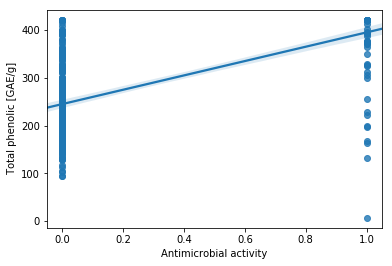

In [35]:
se = sns.regplot(x="se_AMA", y="TP_avg", data=salmonella_df)
se.set(xlabel= "Antimicrobial activity", ylabel=" Total phenolic [GAE/g]")
# pearson's r for total phenol/ama = 0.698297

[Text(0,0.5,u'Tannins g of [CE/kg]'), Text(0.5,0,u'Antimicrobial activity')]

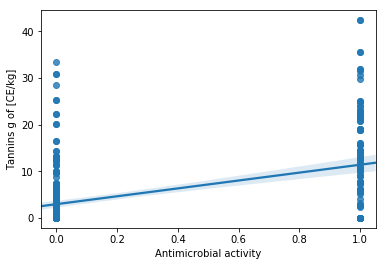

In [36]:
se_tan = sns.regplot(x="se_AMA", y ="Tannins", data=salmonella_df)
se_tan.set(xlabel= "Antimicrobial activity", ylabel="Tannins g of [CE/kg]")

In [37]:
salmonella_df.corr(method="pearson")
# pearson's r for tannins/ama = 0.508

,TP_avg,se_AMA,Testa,Tannins
TP_avg,1.000000,0.703309,0.537081,0.404649
se_AMA,0.703309,1.000000,0.599116,0.455848
Testa,0.537081,0.599116,1.000000,0.548876
Tannins,0.404649,0.455848,0.548876,1.000000


[Text(17.2,0.5,u'Tannins g of [CE/kg]'),
 Text(0.5,17.2,u'Antimicrobial activity')]

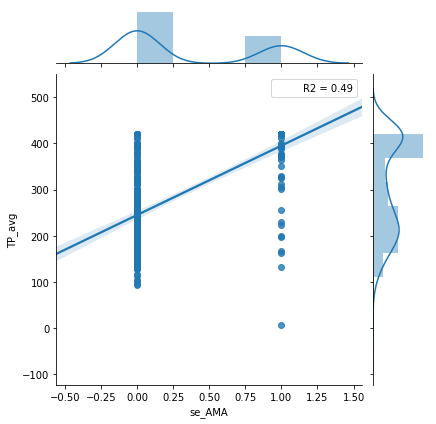

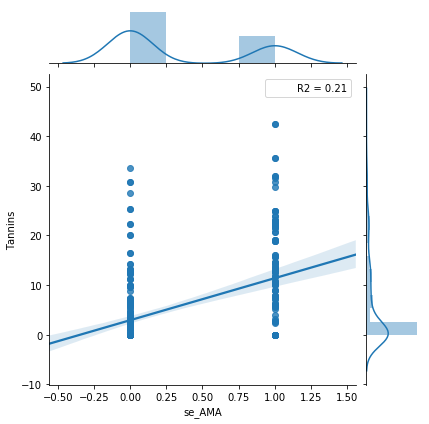

In [38]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(x="se_AMA", y="TP_avg", data=salmonella_df, kind="reg", stat_func=R2)
se.set(xlabel= "Antimicrobial activity", ylabel=" Total phenolic [GAE/g]")
sns.jointplot(x="se_AMA", y="Tannins", data=salmonella_df, kind="reg", stat_func=R2)
se_tan.set(xlabel= "Antimicrobial activity", ylabel="Tannins g of [CE/kg]")

# Compositional data

In [45]:
nir_raw = pd.read_excel("../data/Supplemental_F1.xlsx", sheet_name="Raw")
columns = ["_".join(i.split()) for i in list(nir_raw.columns)]
nir_raw.columns = columns
nir_raw.head()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,NDF,Nitrogen,Nitrogen_mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,6.83,1.47,7.73,0.34,4.51,9.5,-0.17,0,69.89,19.95
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.8,...,14.95,2.1,10.7,0.39,6.14,12.84,-0.13,0,61.98,23.58
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.5,89.68,61.26,10.8,7.92,-1.98,...,5.99,1.65,8.66,0.33,5.12,10.42,-0.13,0,72.12,15.92
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.7,10.4,1.19,...,8.84,2.14,11.04,0.39,6.08,13.63,-0.19,0,66.76,22
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,9.1,1.97,9.96,0.37,5.97,12.31,-0.23,0,67.67,20.49


In [56]:
fl17_Raw = pd.read_excel("../data/Supplemental_F1.xlsx", sheet_name="Raw")
columns = ["_".join(i.split()) for i in list(fl17_Raw.columns)]
fl17_Raw.columns = columns
rep = []
for i in fl17_Raw.Sample_ID:
    if (pd.isnull(i)):
        rep.append(np.nan)
    elif (i in rep_1_list):
        rep.append(1)
    elif (i in rep_2_list):
        rep.append(2)
    else:
        rep.append(np.nan)
fl17_Raw["Rep"] = rep
fl17_Raw.head()

NameError: name 'rep_1_list' is not defined

In [48]:
numeric_columns = nir_raw.columns[3:len(nir_raw.columns)-1]
x = nir_raw[numeric_columns.values]

In [49]:
nir_ama_lines = pd.read_excel("../data/Supplemental_F2.xlsx","Clostridium")
nir_ama_lines = nir_ama_lines[["Sample ID","cp_AMA",]]
nir_ama_lines.head()

,Sample ID,cp_AMA
0,p0101-M1,0.0
1,p0101-M2,0.0
2,p0102-M1,0.0
3,p0102-M2,0.0
4,p0103-M2,0.0


In [53]:
numeric_columns.values

array([u'ADF', u'Aflatoxin', u'Amylopectin',
       u'Amylopectine_to_Total_Dry_Matter_Dry_basis', u'Amylose',
       u'Amylose_to_Total_Dry_Matter_Dry_basis', u'aNDFom', u'Arsenic',
       u'Ash', u'BTU', u'Cadmium', u'Cal', u'Calcium', u'Copper',
       u'Deoxynivalenol', u'Dry_matter', u'Fat', u'Fumonisin', u'Iron',
       u'IVSD', u'KCal', u'Lead', u'Magnesium', u'Manganese', u'Moisture',
       u'Moisture_for_Ash', u'Moisture_for_Fat', u'NDF', u'Nitrogen',
       u'Nitrogen_mg', u'Phosphorus', u'Prolamin', u'Protein',
       u'Selenium', u'Sodium', u'Starch'], dtype=object)

In [50]:
fl17_ama = nir_raw.merge(nir_ama_lines, left_on="Sample_ID",right_on="Sample ID", how="outer")
fl17_ama.head()

,PI,Common,Sample_ID,ADF,Aflatoxin,Amylopectin,Amylopectine_to_Total_Dry_Matter_Dry_basis,Amylose,Amylose_to_Total_Dry_Matter_Dry_basis,aNDFom,...,Nitrogen_mg,Phosphorus,Prolamin,Protein,Selenium,Sodium,Starch,Zinc,Sample ID,cp_AMA
0,PI533876,KA 12 Janjari,FL17-SAP-M1-p0101,4.92,0.21,88.89,54.44,13.63,10.96,1.42,...,7.73,0.34,4.51,9.5,-0.17,0,69.89,19.95,NaN,NaN
1,PI576350,SAP-417,FL17-SAP-M1-p0102,7.24,2.28,83.41,51.83,15.86,9.72,-0.8,...,10.7,0.39,6.14,12.84,-0.13,0,61.98,23.58,NaN,NaN
2,PI595741,SAP-134,FL17-SAP-M1-p0105,3.28,3.5,89.68,61.26,10.8,7.92,-1.98,...,8.66,0.33,5.12,10.42,-0.13,0,72.12,15.92,NaN,NaN
3,PI534096,SO 85,FL17-SAP-M1-p0106,5.55,2.37,85.91,52.52,13.7,10.4,1.19,...,11.04,0.39,6.08,13.63,-0.19,0,66.76,22,NaN,NaN
4,PI534047,450 Bori Light Brown,FL17-SAP-M1-p0107,5.64,1.51,86.53,56.83,12.54,10.57,1.02,...,9.96,0.37,5.97,12.31,-0.23,0,67.67,20.49,NaN,NaN


ValueError: zero-size array to reduction operation minimum which has no identity

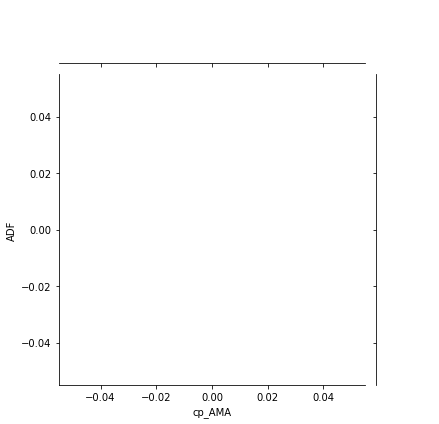

In [54]:
def R2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

for i in list(numeric_columns.values):
    sns.jointplot(x="cp_AMA", y=i, data=fl17_ama, kind="reg", stat_func=R2)
    plt.show()
    

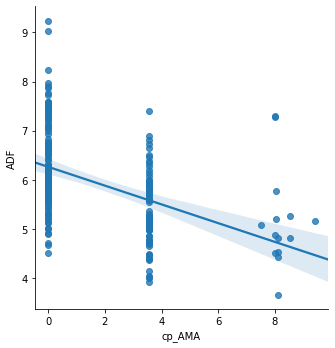

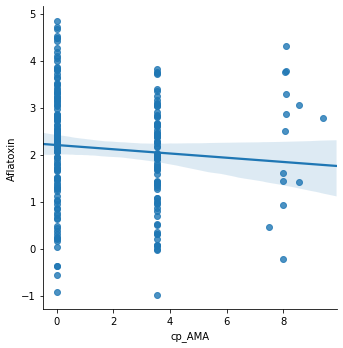

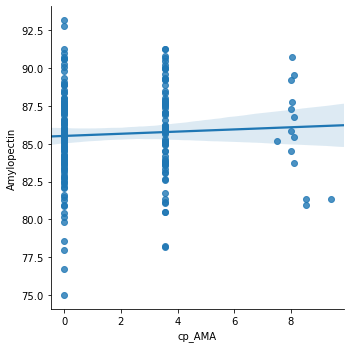

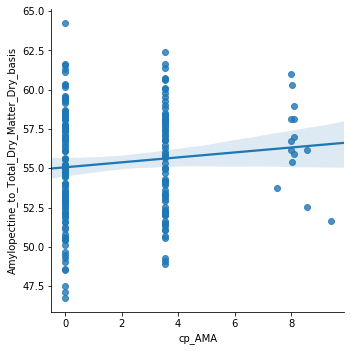

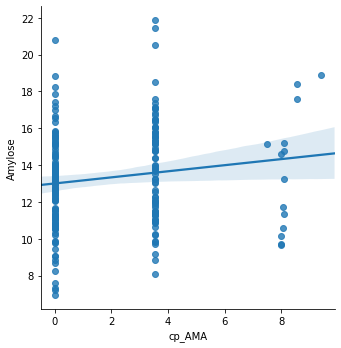

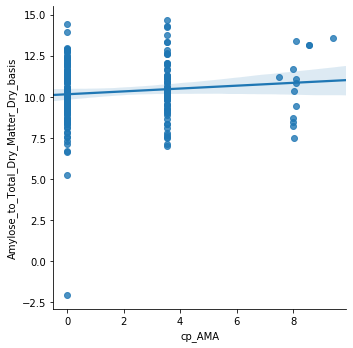

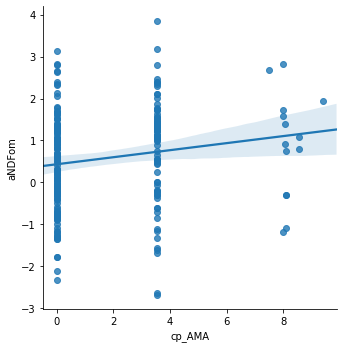

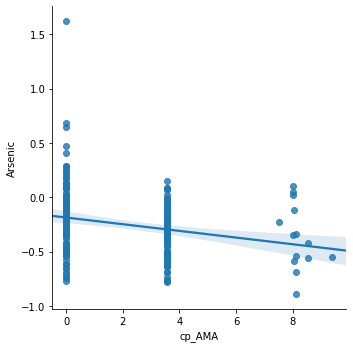

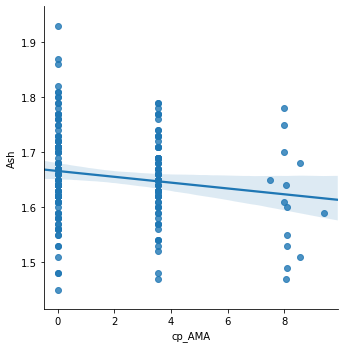

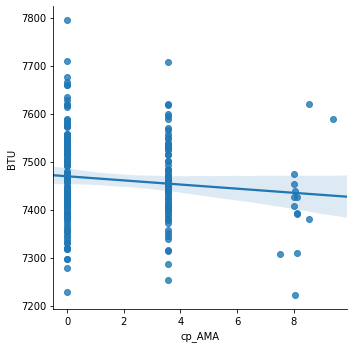

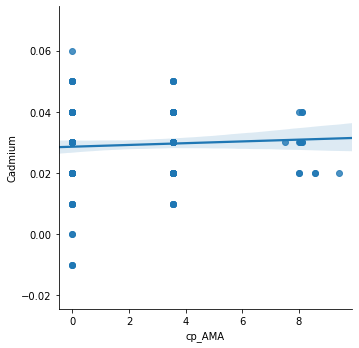

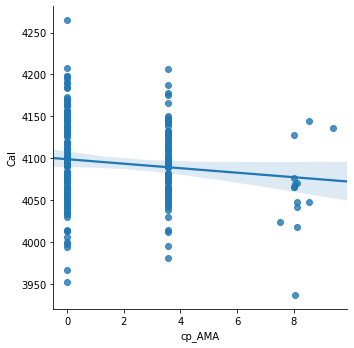

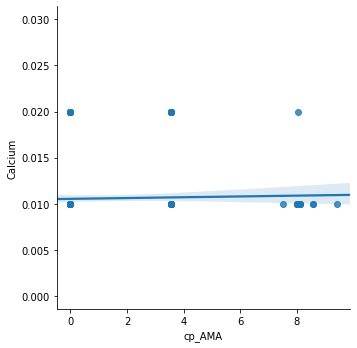

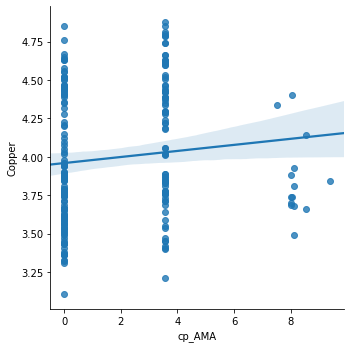

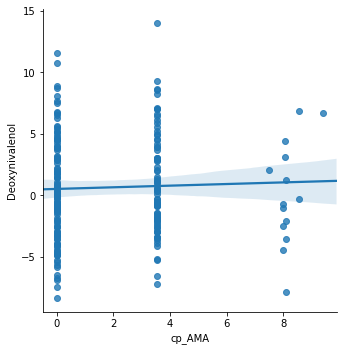

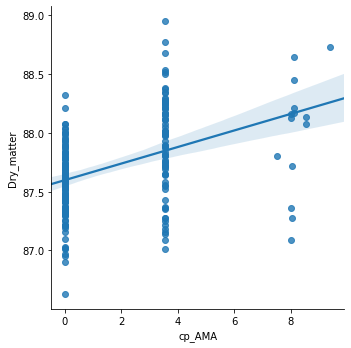

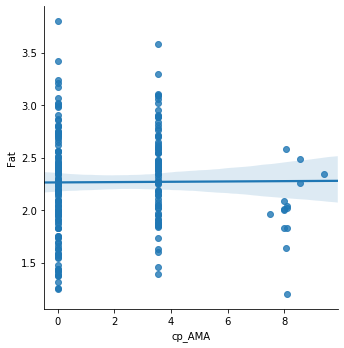

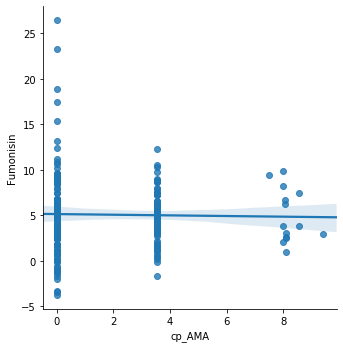

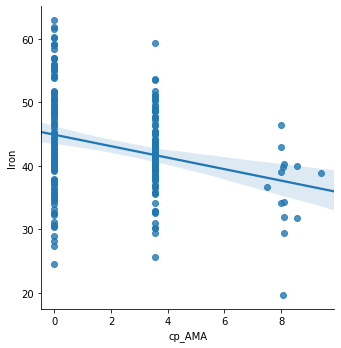

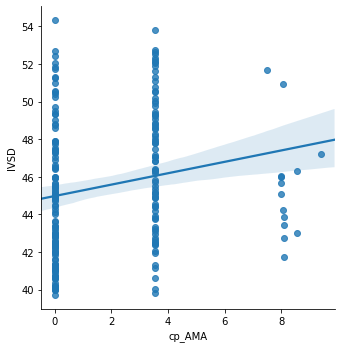

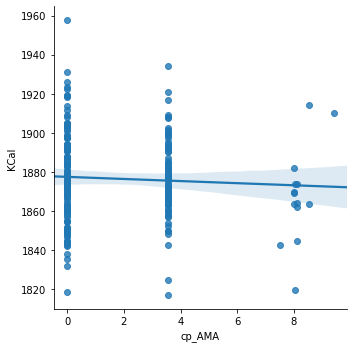

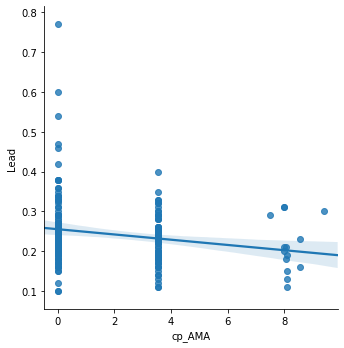

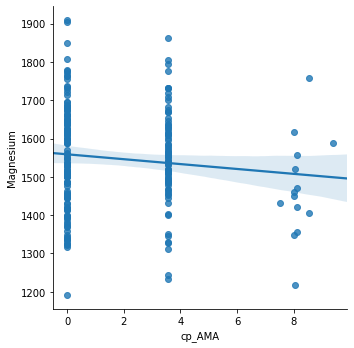

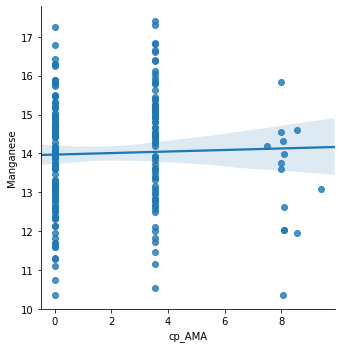

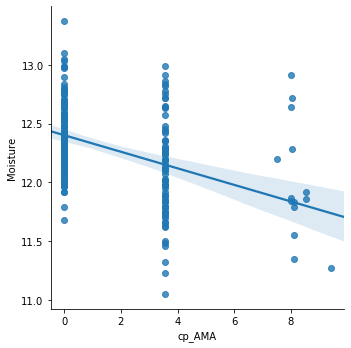

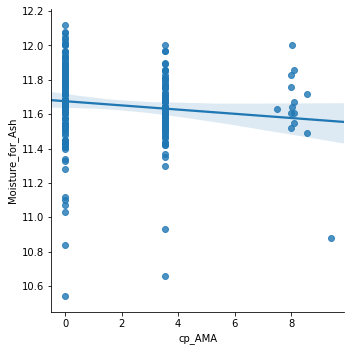

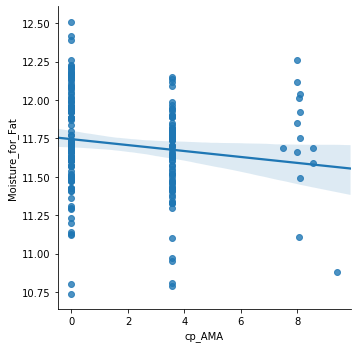

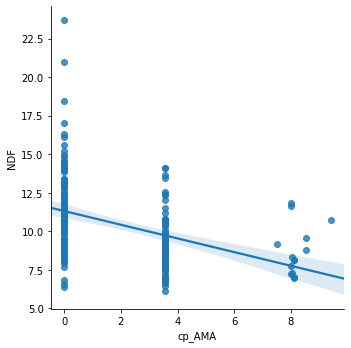

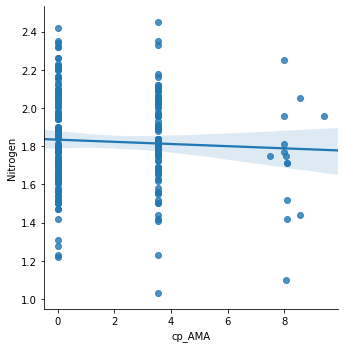

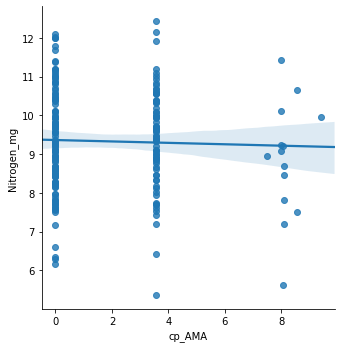

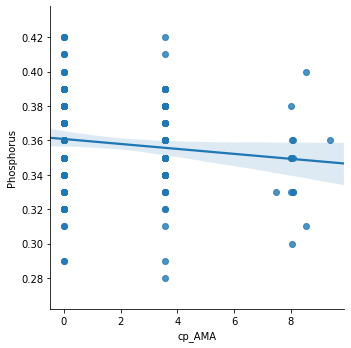

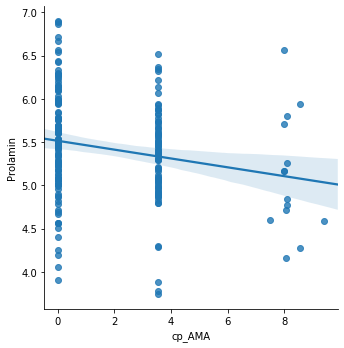

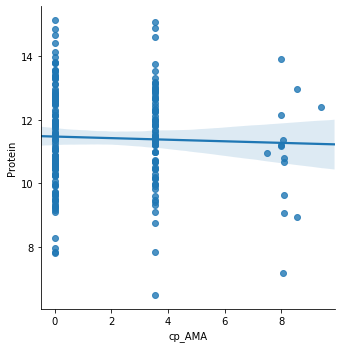

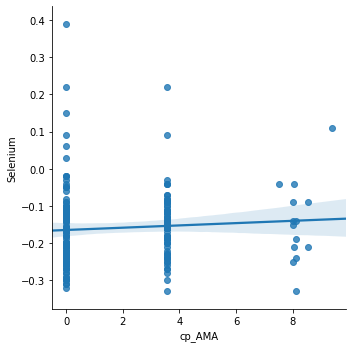

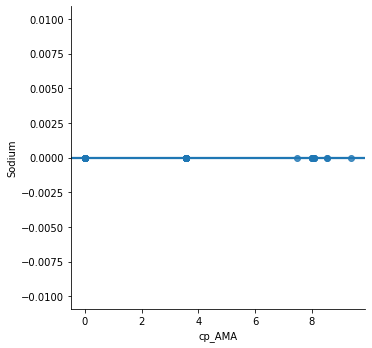

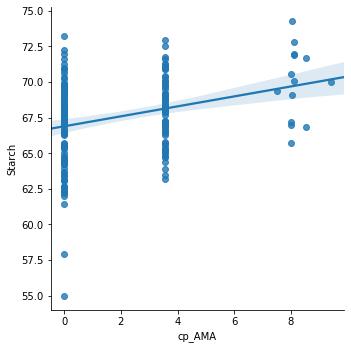

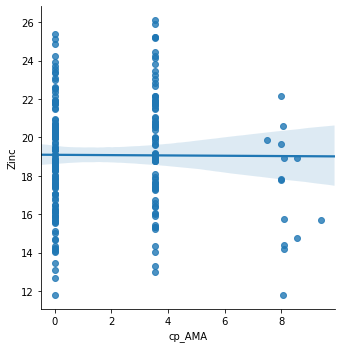

In [233]:
for i in numeric_columns.values:
#     fig = plt.figure(figsize=(50,50))
    sns.pairplot(x_vars="cp_AMA", y_vars=i, data=fl17_ama, kind="reg", size=5)
    plt.show()
    

In [62]:
corr_pval = pd.DataFrame(p_values, columns=["r","pvalue"])
corr_pval = corr_pval.drop(34)
corr_pval.tail()

,r,pvalue
31,-0.024743,0.491298
32,-0.006443,0.857792
33,0.051308,0.153314
35,0.013985,0.697310
36,0.004231,0.906324


In [57]:
corr_pval.to_excel("corr_pval.xlsx")

NameError: name 'corr_pval' is not defined

In [63]:
import statsmodels.api as sms

sms.stats.multipletests(corr_pval["pvalue"], alpha=0.05, method="fdr_bh")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.98911538, 0.59033505, 0.59033505, 0.89490213, 0.71648918,
        0.59033505, 0.59033505, 0.80149612, 0.90447545, 0.59033505,
        0.80149612, 0.77333691, 0.59033505, 0.8766808 , 0.89490213,
        0.36088576, 0.8766808 , 0.8766808 , 0.89490213, 0.8766808 ,
        0.59033505, 0.8766808 , 0.8766808 , 0.89490213, 0.36088576,
        0.35364925, 0.89490213, 0.89490213, 0.89490213, 0.89490213,
        0.59033505, 0.8766808 , 0.9082505 , 0.59033505, 0.89490213,
        0.93221909]),
 0.0014237991678133222,
 0.001388888888888889)